# Übung: Machine Learnins Basics

Stand: SoSe 2022

Geschätzte benötigte Zeit: 60 Minuten

Autor: Jenny Kozielski

Abgabe: Freitag, 17.07.2022 (23:55 Uhr)

______

# Hausübung

### Abgaberichtlinien
* Jede Hausübung bringt maximal 10 Hausaufgabenpunkte. 10 Hausaufgabenpunkte entsprechen einem Klausurpunkt.
* Im Laufe des Semesters kann es zusätzliche Bonuspunkte (= 1 Klausurpunkt) für Hausübungen geben, in Form von z.B. Challenges, weitere Informationen folgen bei den betreffenden Hausübungen.
* Die Abgabe erfolgt in Zweier- bis Viererteams. **Einzelabgaben werden nicht gewertet**. Die Teammitglieder müssen nicht in derselben Übungsgruppe sein. Bei Problemen bzw. Einzelfällen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* In der Abgabe müssen alle Teammitglieder mit **Namen und Matrikelnummern gut sichtbar** genannt werden.
* Es muss immer nur **ein Teammitglied der Gruppe abgeben**. Sollten aus Versehen mehrere Abgaben der selben Übung erfolgen, kommunizieren Sie dies **zeitnah** an einen Tutor, ansonsten wird die erste korrigierte Abgabe gewertet.
* Die Abgabe soll als Jupyter-Notebook erfolgen (.ipynb). Abgaben in einem **anderen Format werden nicht gewertet**. Bei Problemen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* Es ist nicht nötig, den Präsenzübungsteil in der Abgabe mit abzugeben. Es wird lediglich der Hausübungsteil gewertet.
* Wenn Sie Bilder in der Hausaufgaben abgeben wollen, fügen Sie diese folgendermaßen ein: Laden Sie das entsprechende Bild bei Google Drive hoch. Klicken Sie per Rechtsklick auf das Bild. Klicken Sie auf "Link abrufen". Setzen Sie die Zugangsberechtigung auf "Jeder, der über den Link verfügt". Kopieren Sie den Link. Erstellen Sie eine Textzelle im Notebook in der Sie das Bild einfügen möchten. Fügen Sie den Link folgendermaßen ein: ``![Bildbeschreibung]``(Link hier einfügen, in diesen Klammern). Ändern Sie den Link folgendermaßen: Von "https://drive.google.com/file/d/XXXXX/view?usp=sharing" zu "https://drive.google.com/uc?id=XXXXX". XXXXX bezeichnet in diesem Fall die individuelle ID, die in Ihrem Link vorkommt.

# Aufgabe 1:
### 10 Hausaufgabenpunkte

Entwickeln Sie ein Language Identification System basierend auf dem unten stehenden Code.
Der verwendete Klassifikator darf nicht verändert werden.
Sie dürfen jedoch andere Features verwenden, sowie die Datenbasis verändern/erweitern.
Die Aufgabe gilt als gelöst wenn eine einigermaßen gute Besserung in den Evaluierungsmaßen erkennbar ist.

**ACHTUNG!** Bitte laden die Daten vom Github (https://github.com/MMesgar/Foundation_of_AI/tree/master/lecture08) in Ihr Google Drive. Stellen Sie sicher, dass die Datenstruktur wie im Code unten gegeben ist. Die Dateien müssen in der Ordnerstruktur MyDrive - data - lid gespeichert sein.

Wenn Sie eigenen Daten nutzen wollen, geben Sie diese mit Ihrer Abgabe ab.

Die Daten können Sie beispielsweise so im Notebook einfügen:
```
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
```

**Hinweis:** Für das Erfüllen der Hausaufgabe genügen auch geringe Änderungen, die aber wirkungsvoll sind.

In [ ]:
# Sie müssen sich beim ausführen bei Google einloggen und Zugriff gewähren
from google.colab import drive
drive.mount('/content/gdrive/')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn import metrics

# the training data folder must be passed as first argument
dataset = load_files('/content/gdrive/MyDrive/data/lid/')

# split the dataset in training and test set:
n = dataset.filenames.shape[0]
split = int(n*0.8)

x_train = [open(f, encoding='utf-8').read() for f in dataset.filenames[:split]]
x_test = [open(f, encoding='utf-8').read() for f in dataset.filenames[split:]]

y_train = dataset.target[:split]
y_test = dataset.target[split:]

<AxesSubplot:ylabel='count'>

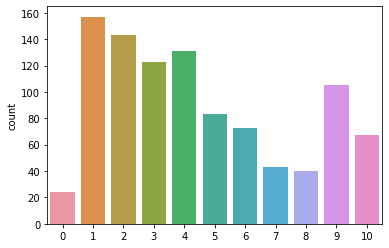

In [3]:
import seaborn as sns

# show the class distribution
%matplotlib inline
sns.countplot(data=dataset, x='target')

In [6]:
clf = Pipeline([
    ('vec', CountVectorizer(analyzer="word")),
    ('clf', SVC()), # DO NOT CHANGE THIS CLASSIFIER!
])

# Fit the pipeline on the training set
clf.fit(x_train, y_train)

# Predict the outcome on the testing set
y_predicted = clf.predict(x_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de détection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
]

predicted = clf.predict(sentences)

print()

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

              precision    recall  f1-score   support

          ar       1.00      0.75      0.86         4
          de       1.00      0.92      0.96        37
          en       0.94      1.00      0.97        31
          es       1.00      0.90      0.95        21
          fr       1.00      0.91      0.95        23
          it       1.00      0.83      0.91        18
          ja       0.36      1.00      0.53        13
          nl       1.00      0.67      0.80         9
          pl       1.00      0.50      0.67        10
          pt       1.00      0.91      0.95        22
          ru       1.00      0.60      0.75        10

    accuracy                           0.87       198
   macro avg       0.94      0.82      0.85       198
weighted avg       0.95      0.87      0.89       198

[[ 3  0  0  0  0  0  1  0  0  0  0]
 [ 0 34  0  0  0  0  3  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  2  0  0  0  0]
 [ 0  0  1  0 21  0  1  0  0  0  0]
 [ 0  0

Mehr Daten:
* Wikipedia
* http://www.cs.cmu.edu/~ralf/langid.html
* https://wortschatz.uni-leipzig.de/en/download

### 1 Extra-Klausurbonuspunkt
                                
Ein Extra-Klausurbonuspunkt wird an die fünf bestplazierten Teams vergeben.
Die Endergebnisse werden in der Vorlesung sowie in einer Liste auf Moodle präsentiert.